<a href="https://colab.research.google.com/github/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/SaiNithinReddy_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [233]:
# Write your code here

import pandas as pd
df=pd.read_csv('/content/sentiment_reviews.csv')


In [234]:
df.head()

,document_id,After Lemmatization,sentiment
0,1,in sure hand star review receiv product time ...,Positive
1,2,in sure hand star review receiv product time ...,Positive
2,3,scare read review peopl complain state phone m...,Positive
3,4,in sure hand star review receiv product time ...,Positive
4,5,scare read review peopl complain state phone m...,Positive


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document_id          2035 non-null   int64 
 1   After Lemmatization  2035 non-null   object
 2   sentiment            2035 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.8+ KB


In [236]:
df = df.rename(columns={"After Lemmatization": "Clean_Text"})
df.head()

,document_id,Clean_Text,sentiment
0,1,in sure hand star review receiv product time ...,Positive
1,2,in sure hand star review receiv product time ...,Positive
2,3,scare read review peopl complain state phone m...,Positive
3,4,in sure hand star review receiv product time ...,Positive
4,5,scare read review peopl complain state phone m...,Positive


In [237]:
import nltk  
df['Clean_Text'] = df['Clean_Text'].str.replace('[^\w\s]','')  #removal of punctuation
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-237-7d8a57755d42>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Text'] = df['Clean_Text'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
import gensim

# Tokenize the text
corpus = df['Clean_Text'].apply(str.split)

# Create a dictionary with the corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Convert corpus into a bag of words
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

# Build the LDA model
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the top 10 clusters/topics
for index, topic in enumerate(lda_model.show_topics(num_topics=num_topics)):
    print(f"Topic {index}:")
    print(topic)


Topic 0:
(0, '0.078*"phone" + 0.039*"hand" + 0.039*"batteri" + 0.039*"one" + 0.020*"bit" + 0.020*"day" + 0.020*"charg" + 0.020*"social" + 0.020*"stretch" + 0.020*"use"')
Topic 1:
(1, '0.039*"phone" + 0.026*"transfer" + 0.026*"updat" + 0.026*"review" + 0.026*"star" + 0.026*"look" + 0.026*"littl" + 0.026*"receiv" + 0.026*"good" + 0.026*"set"')
Topic 2:
(2, '0.083*"phone" + 0.055*"came" + 0.055*"upgrad" + 0.028*"receiv" + 0.028*"recommend" + 0.028*"appl" + 0.028*"want" + 0.028*"look" + 0.028*"scare" + 0.028*"set"')
Topic 3:
(3, '0.037*"new" + 0.037*"phone" + 0.025*"brand" + 0.025*"worri" + 0.025*"bad" + 0.025*"day" + 0.025*"review" + 0.025*"disappoint" + 0.012*"box" + 0.012*"expect"')
Topic 4:
(4, '0.137*"good" + 0.068*"reli" + 0.034*"came" + 0.034*"batteri" + 0.034*"review" + 0.034*"one" + 0.034*"bad" + 0.034*"recommend" + 0.034*"first" + 0.034*"also"')
Topic 5:
(5, '0.118*"phone" + 0.028*"batteri" + 0.028*"charg" + 0.026*"order" + 0.026*"scratch" + 0.026*"look" + 0.026*"capac" + 0.026*"

In [239]:


corpus_lda = lda_model[bow_corpus]
num_topics = 10
scores = [[] for i in range(num_topics)]

doc_idx = 0
while doc_idx < len(corpus_lda):
    doc = corpus_lda[doc_idx]
    topic_idx = 0
    while topic_idx < num_topics:
        if len(doc) > topic_idx:
            scores[topic_idx].append(round(doc[topic_idx][1], 2))
        else:
            scores[topic_idx].append(0)
        topic_idx += 1
    doc_idx += 1

# Print the scores assigned for each topic for each review
for i in range(num_topics):
    print(f"Topic {i} scores:")
    print(scores[i])


Topic 0 scores:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [240]:
# Write your code here
df['sentiment'].value_counts()




Positive    1646
Negative     248
Neutral      141
Name: sentiment, dtype: int64

In [241]:
import nltk
df['Clean_Text'] = df['Clean_Text'].str.replace('[^\w\s]','')  #removal of punctuation
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

<ipython-input-241-2302427e2407>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Text'] = df['Clean_Text'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,Clean_Text,sentiment
0,1,sure hand star review receiv product time ship...,Positive
1,2,sure hand star review receiv product time ship...,Positive
2,3,scare read review peopl complain state phone m...,Positive
3,4,sure hand star review receiv product time ship...,Positive
4,5,scare read review peopl complain state phone m...,Positive


In [242]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(df['Clean_Text'])
print(X_tfidf.shape)

(2035, 251)


In [243]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [272]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=111)
model_mnb = mnb.fit(x_train,y_train)

In [273]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.9385749385749386
              precision    recall  f1-score   support

    Negative       0.92      0.67      0.78        49
     Neutral       0.95      0.70      0.81        27
    Positive       0.94      1.00      0.97       331

    accuracy                           0.94       407
   macro avg       0.94      0.79      0.85       407
weighted avg       0.94      0.94      0.93       407



In [274]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=6)
print("Cross Validation Scores using MNB",scores)

Cross Validation Scores using MNB [0.94117647 0.94117647 0.92647059 0.92647059 0.98529412 0.91044776]


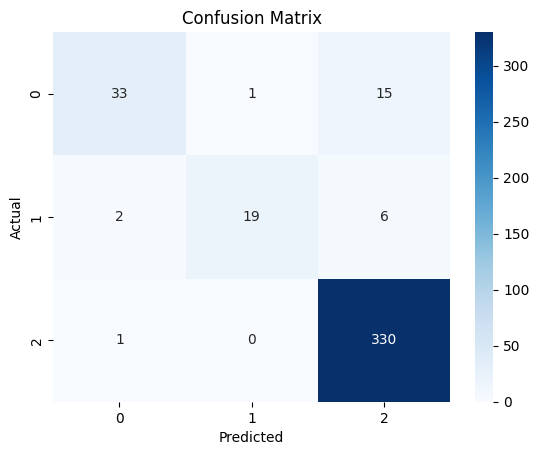

In [275]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test,y_pred_mnb)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [248]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)

In [249]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

    Negative       0.93      0.65      0.76        65
     Neutral       0.96      0.76      0.85        33
    Positive       0.94      1.00      0.97       411

    accuracy                           0.94       509
   macro avg       0.94      0.80      0.86       509
weighted avg       0.94      0.94      0.93       509



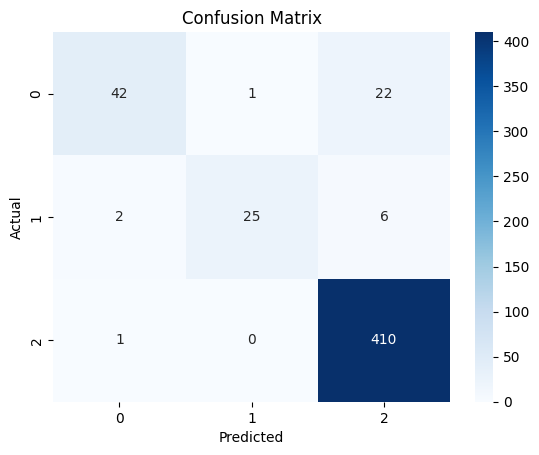

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [251]:
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

Accuracy 0.93713163064833


In [252]:
scores = cross_val_score(svm, x_test, y_test, cv=7)
print("Cross Validation Scores using svm",scores)

Cross Validation Scores using svm [0.91780822 0.95890411 0.91780822 0.95890411 0.95890411 0.90277778
 0.94444444]


Based on the above results we can say that the Navie Bayes and SVM have achieved the good results. By using the Crossvadilation Scores and Classificaton report we can compare the both models.

The Accuracy achieved by Navie Bayes is 93.85%
The Accuracy achieved by SVM is 93.17%

The Precesion and Recall values for positive negative and neutral are high both in Navie Bayes and SVM.

The Cross Validation scores of SVM and Navie bayes is between 00.90 to 0.95

Overall, both algorithms appear to be better for sentiment classification in this dataset since they achieved higher precision, recall, and F1-score for both positive and negative sentiment while maintaining high accuracy and comparable cross-validation performance to Naive Bayes.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [253]:
# Write your code here
import pandas as pd
df_test=pd.read_csv('/content/test.csv')




In [254]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [255]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [256]:
df_train=pd.read_csv('/content/train.csv')

In [257]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

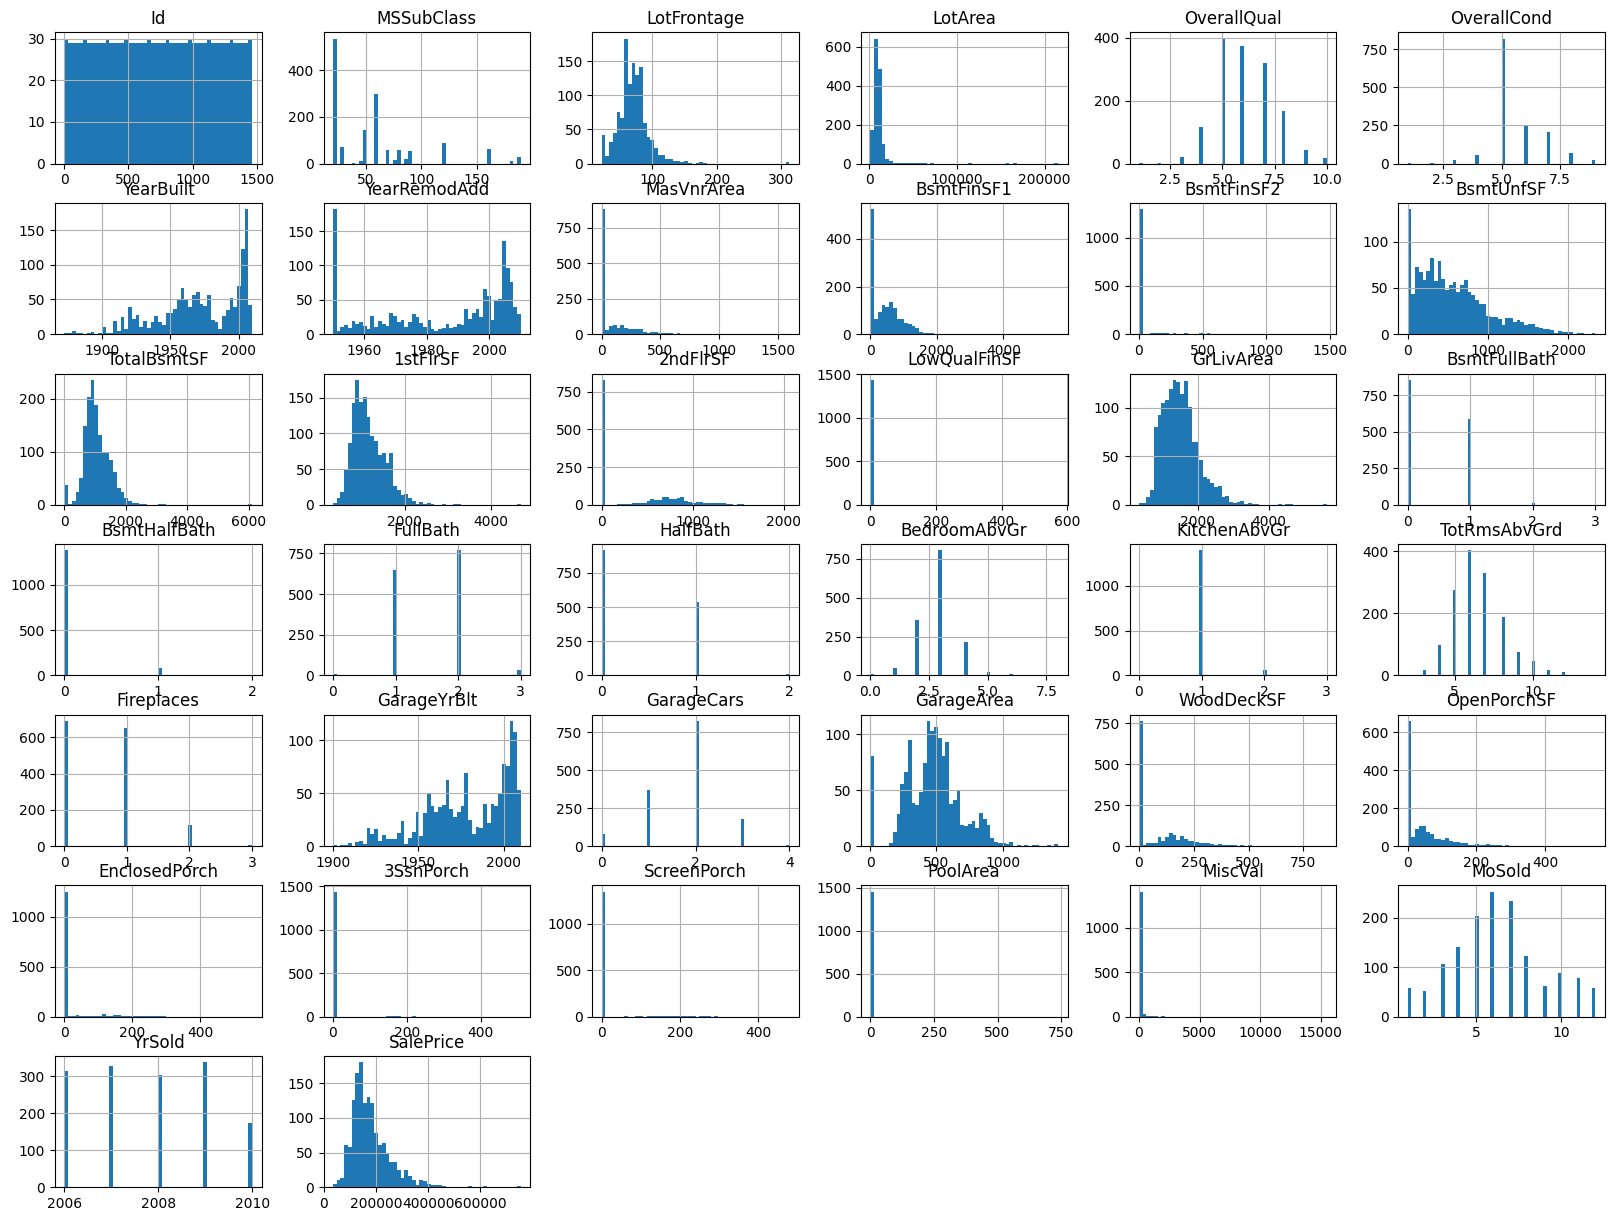

In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [260]:
train_cor = df_train.corr()
train_cor

<ipython-input-260-56220144cc6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_cor = df_train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [261]:
train_cor["YrSold"].sort_values(ascending=False)

YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
LotFrontage      0.007450
MiscVal          0.004906
Id               0.000712
GarageYrBlt     -0.001014
MasVnrArea      -0.008201
EnclosedPorch   -0.009916
HalfBath        -0.010269
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

In [262]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [263]:
# Features and target variable
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]


In [264]:
# Categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [265]:
# define column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

**Splitting the data**

In [266]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)


**Filling Numerical Values with mean**

In [267]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

<ipython-input-267-d356b4c6095a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean(), inplace=True)
<ipython-input-267-d356b4c6095a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.fillna(X_test.mean(), inplace=True)


**Filling Categorical values with Mode**

In [268]:
# fill missing categorical values with mode
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)


In [269]:
# fit a linear regression model on the train set
LR= Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
LR.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

**Predictions on Test set**

In [270]:
y_pred = LR.predict(X_test)
print("Predicted House Prices: ", y_pred)


Predicted House Prices:  [202027.68817827 197014.01400336 206165.26643056 216926.18920663
 356642.73046664 185826.42769502 159749.65964946 249589.7116766
 200279.28605854 204311.46845275 129361.94924717 144954.81325505
 176098.45583969 126832.3245893  207375.63157121 129660.71863298
  70110.76740966 196069.70598261 177910.41834316 143605.32292947
 193537.51137499 151950.40690897 192266.20207482 264820.68367051
 129458.22400221 179719.02753725 225781.88442349 152277.47951694
 263711.76735475 263711.30842228 375589.33247813 158966.29928894
 112531.66235825 175307.39331867 152265.87658066 196444.87889507
 172094.67191376 185718.15937203  82278.57761629 128574.70404221
 210015.92182808 265381.85154236  28114.79654561 149768.64422358
 119325.27499336 153243.83415861 247483.46250891 143136.92833364
 144861.52571981 268423.87329499 321520.12506234 186572.8705777
 210392.51028027 273442.61506351 183849.67793988 189307.63021687
 187879.79803119 195942.34316238 210036.00968774 162291.27657725
 2

**Metrics by using R square**

In [271]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Square:', r2)

R2 Square: 0.7301857077668796
